In [1]:
import os
import pickle
import numpy as np

from openmmtools.multistate import MultiStateReporter, MultiStateSamplerAnalyzer

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [9]:
def generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, phase, save_path=None):
    """
    
    Adapted mixing plots from Yank: https://github.com/choderalab/yank/blob/master/Yank/reports/notebook.py#L319

    """
    
    # Set figure size
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex='col', figsize=(8, 8), squeeze=True)

    # Set font size
    plt.rc('font', size=17) 

    # Set color map
    colors = ["white", "#1C73D6"] # first color is white, last is blue
    cmap = LinearSegmentedColormap.from_list("BlueWhite", colors)

    # Plot
    output_image = plt.imshow(transition_matrix, aspect='equal', cmap=cmap, vmin=0, vmax=1)

    # Add colorbar.
    decimal = 1
    nticks = 11
    cbar = plt.colorbar(output_image, 
                        orientation='vertical', 
                        format='%.{}f'.format(decimal),
                        fraction=0.0455
                       )

    # Set ticks.
    ticks = np.linspace(0, 1, nticks)
    cbar.set_ticks(ticks)

    # Label axes   
    plt.xlabel("State")
    plt.ylabel("State")

    # Set title
    perron_eigenvalue = eigenvalues[1]
    equilibration_timescale = 1.0 / (1.0 - perron_eigenvalue)
    subtitle_text = (f'Perron eigenvalue: {round(perron_eigenvalue, 2)}\n'
                     f'State equilibration timescale: ~{round(equilibration_timescale, 2)} iterations\n'
                     f'Replica state index statistical inefficiency: {round(statistical_inefficiency, 2)}\n')
    plt.suptitle(subtitle_text, fontsize=17, x=0.54, y=0.76)
    plt.title(f"Transition matrix for {mutation} {phase}", fontsize=22, y=1.18)
    
    # Ensure x-axis labels are not cut off
    plt.tight_layout()

    # Save plot as pdf
    if save_path:
        plt.savefig(save_path, dpi=500)
        plt.show()
    else:
        plt.show()


# Dipeptide

## ACE, NME caps

/scratch/lsftmp/13862349.tmpdir/ipykernel_36564/328205414.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

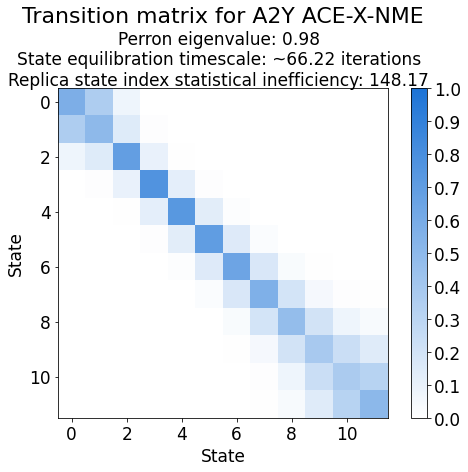

<Figure size 432x288 with 0 Axes>

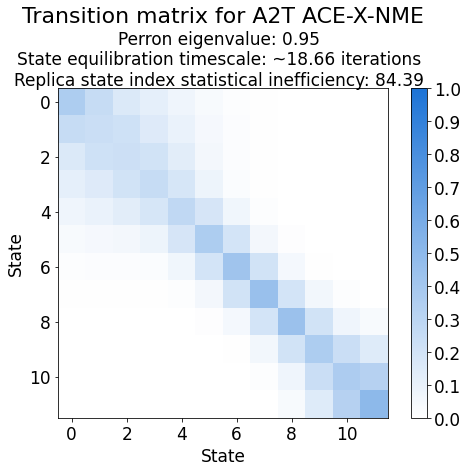

<Figure size 432x288 with 0 Axes>

In [6]:
main_dir = 46
phase = 'apo'
replicate = 0
sub_dirs = [11, 13]
mutations = ["A2Y", "A2T"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    
    # Get mixing data
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=5000)
    transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()

    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_ACE_NME_mixing_5ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, "ACE-X-NME", save_path=save_path)


/scratch/lsftmp/13862349.tmpdir/ipykernel_36564/1802093991.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

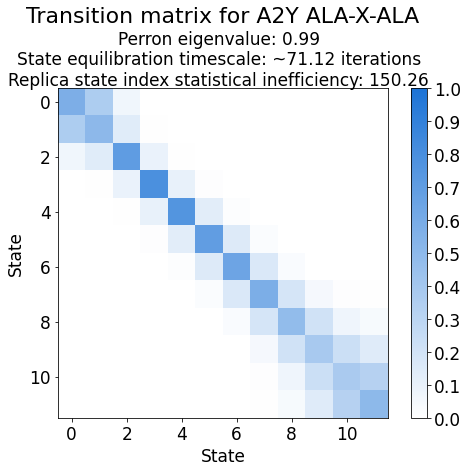

<Figure size 432x288 with 0 Axes>

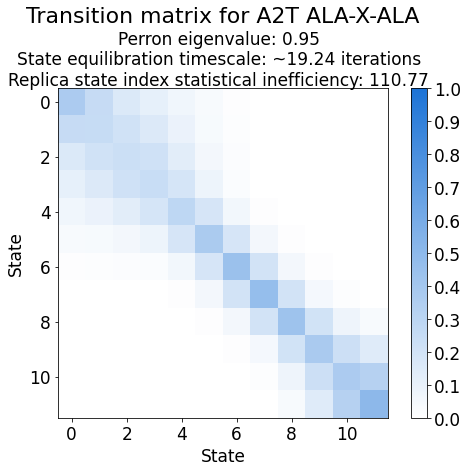

<Figure size 432x288 with 0 Axes>

In [5]:
main_dir = 46
phase = 'apo'
replicate = 0
sub_dirs = [31, 33]
mutations = ["A2Y", "A2T"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    
    # Get mixing data
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=5000)
    transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()

    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_ALA_mixing_5ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, "ALA-X-ALA", save_path=save_path)


# Barnase:barstar (AREX)

## Apo

/scratch/lsftmp/13803149.tmpdir/ipykernel_51502/1524174918.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

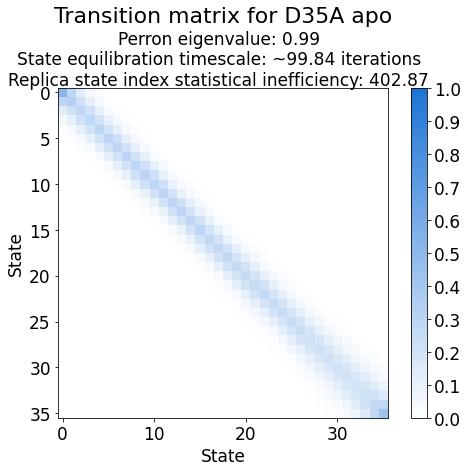

<Figure size 432x288 with 0 Axes>

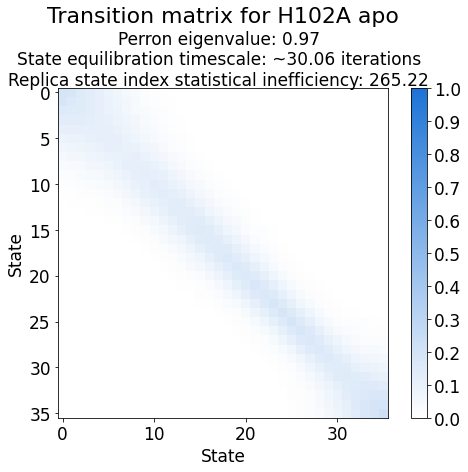

<Figure size 432x288 with 0 Axes>

In [58]:
main_dir = 47
phase = 'apo'
replicate = 1
sub_dirs = [7, 13]
mutations = ["D35A", "H102A"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    
    # Get mixing data
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=10000)
    transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()

    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_mixing_10ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, phase, save_path=save_path)


## Complex

/scratch/lsftmp/13803149.tmpdir/ipykernel_51502/2354393365.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

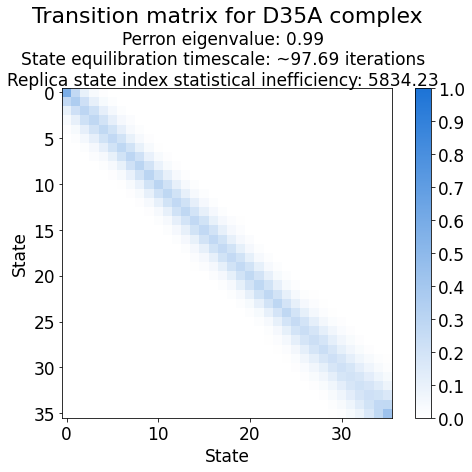

<Figure size 432x288 with 0 Axes>

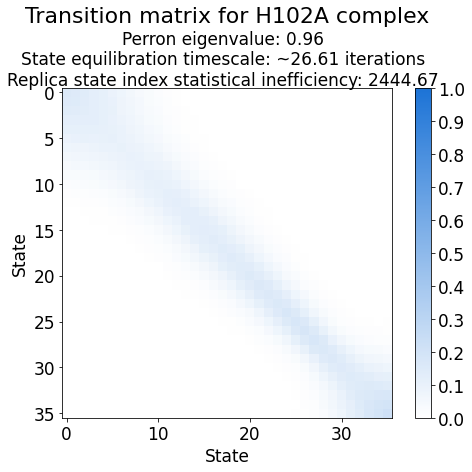

<Figure size 432x288 with 0 Axes>

In [60]:
main_dir = 47
phase = 'complex'
replicate = 1
sub_dirs = [7, 13]
mutations = ["D35A", "H102A"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    
    # Get mixing data
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=10000)
    transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()

    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_mixing_10ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, phase, save_path=save_path)


# Barnase:barstar (AREST)

## Complex

/scratch/lsftmp/14514162.tmpdir/ipykernel_60291/587538908.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

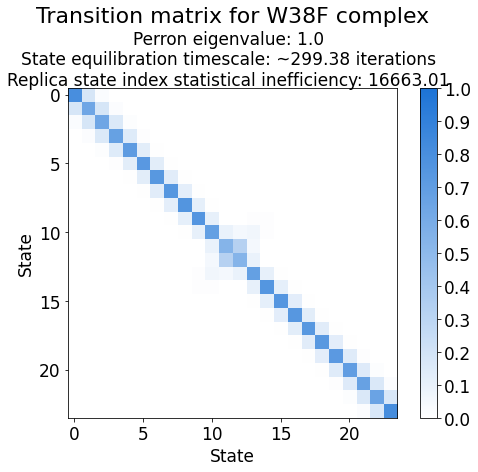

<Figure size 432x288 with 0 Axes>

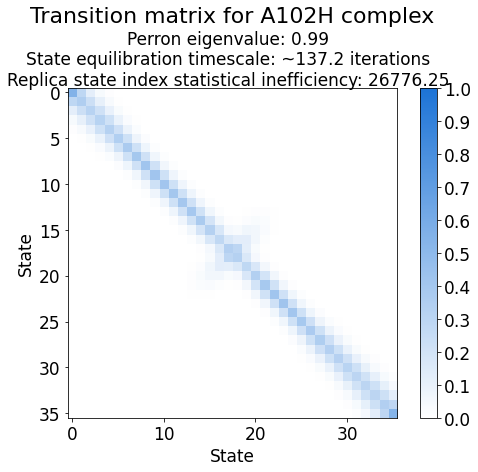

<Figure size 432x288 with 0 Axes>

In [6]:
main_dir = 52
phase = 'complex'
replicate = 0
sub_dirs = [2, 27]
mutations = ["W38F", "A102H"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    
    # Get mixing data
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=50000)
    transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()

    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_mixing_50ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, phase, save_path=save_path)


/scratch/lsftmp/14514162.tmpdir/ipykernel_60291/1938995506.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

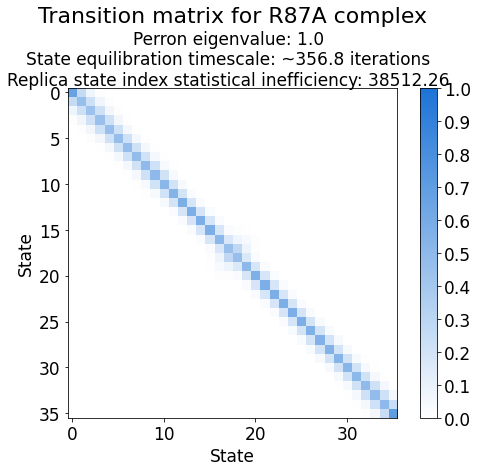

<Figure size 432x288 with 0 Axes>

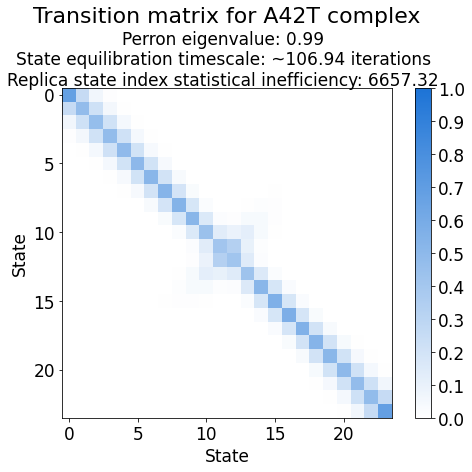

<Figure size 432x288 with 0 Axes>

In [5]:
main_dir = 52
phase = 'complex'
replicate = 0
sub_dirs = [12, 17]
mutations = ["R87A", "A42T"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    
    # Get mixing data
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=50000)
    transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()

    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_mixing_50ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, phase, save_path=save_path)
